In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings(action = 'ignore')

In [29]:
df = pd.read_csv("spotify_churn_dataset.csv")
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [31]:
df.isnull().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

In [32]:
df['gender'].nunique()

3

In [33]:
df['country'].value_counts()

country
AU    1034
US    1032
DE    1015
IN    1011
PK     999
FR     989
UK     966
CA     954
Name: count, dtype: int64

In [34]:
df['subscription_type'].value_counts()

subscription_type
Premium    2115
Free       2018
Student    1959
Family     1908
Name: count, dtype: int64

In [35]:
df['device_type'].value_counts()

device_type
Desktop    2778
Web        2623
Mobile     2599
Name: count, dtype: int64

In [36]:
df.drop(columns = ["user_id"], inplace=True)

In [37]:
categorical_cols = ["gender","subscription_type","device_type","country"]
numeric_cols = [col for col in df.columns if col not in categorical_cols]

In [38]:
numeric_cols

['age',
 'listening_time',
 'songs_played_per_day',
 'skip_rate',
 'ads_listened_per_week',
 'offline_listening',
 'is_churned']

In [39]:
X = df.drop(columns=["is_churned"])
y = df['is_churned']

In [40]:
df[numeric_cols]

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
0,54,26,23,0.20,31,0,1
1,33,141,62,0.34,0,1,0
2,38,199,38,0.04,0,1,1
3,22,36,2,0.31,0,1,0
4,29,250,57,0.36,0,1,1
...,...,...,...,...,...,...,...
7995,44,237,36,0.30,0,1,1
7996,34,61,64,0.59,0,1,0
7997,17,81,62,0.33,5,0,0
7998,34,245,94,0.27,0,1,0


In [ ]:
numeric_cols.remove('is_churned')

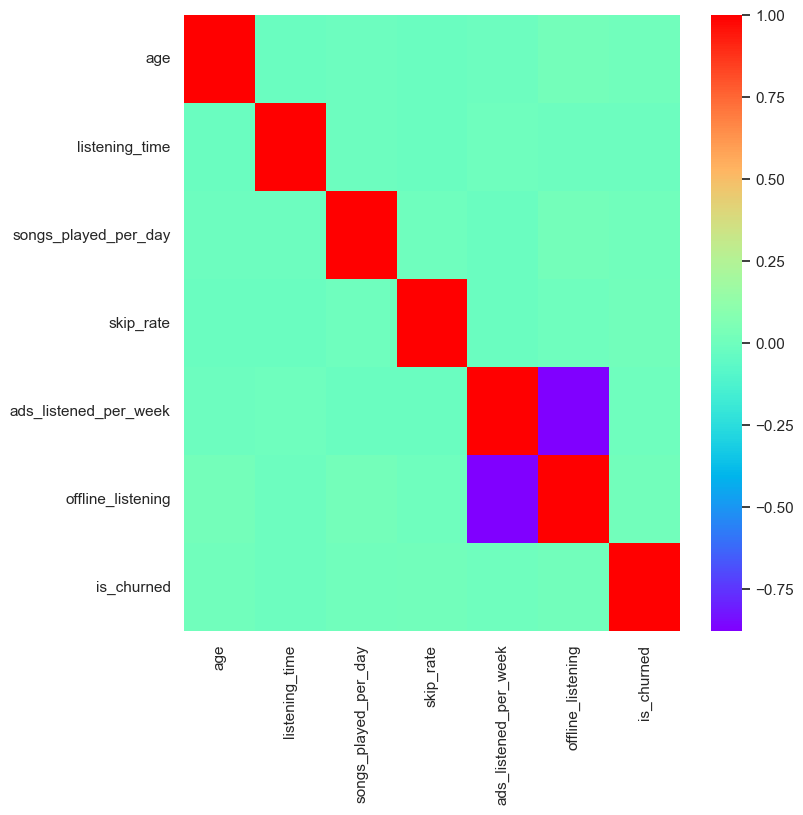

In [42]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap(df[numeric_cols].corr(),cmap="rainbow")
plt.show()

In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [49]:
numeric_transformer = StandardScaler()

In [59]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [60]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])

In [61]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'listening_time',
                                                   'songs_played_per_day',
                                                   'skip_rate',
                                                   'ads_listened_per_week',
                                                   'offline_listening']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender',
                                                   'subscription_type',
                                                   'device_type',
                                                   'country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [62]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7431


In [63]:
import joblib

joblib.dump(model, 'rf_pipeline.pkl')

# Load model later
model = joblib.load('rf_pipeline.pkl')

In [71]:
from pathlib import Path

path =   "model.joblib"


artifact = {
        "model": model,
        "target_names": 'is_churned'
}

joblib.dump(artifact, path)
print(f"✅ Model trained and saved at {path}")

✅ Model trained and saved at model.joblib
